In [1]:
import pandas as pd
asn_names = ['IPv4', 'gateway', '??', 'Registrant']
asn_df = pd.read_csv(filepath_or_buffer='/kaggle/input/global-ip-dataset-by-location-2023/asn-ipv4.csv', names=asn_names)
asn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363049 entries, 0 to 363048
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   IPv4        363049 non-null  object
 1   gateway     363049 non-null  object
 2   ??          363049 non-null  int64 
 3   Registrant  363045 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.1+ MB


In [2]:
dbip_df = pd.read_csv(filepath_or_buffer='/kaggle/input/global-ip-dataset-by-location-2023/dbip-city-ipv4.csv', 
                      header=None).reset_index(drop=True).drop(columns=[4, 6, 9])
dbip_df.columns = ['IPv4', 'gateway', 'ISO-2', 'Metro', 'City', 'latitude', 'longitude', ]
octets = ['octet-1', 'octet-2', 'octet-3', 'octet-4']
dbip_df[octets] = dbip_df['IPv4'].str.split(pat='.', n=3, expand=True).astype(int)
dbip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182050 entries, 0 to 3182049
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   IPv4       object 
 1   gateway    object 
 2   ISO-2      object 
 3   Metro      object 
 4   City       object 
 5   latitude   float64
 6   longitude  float64
 7   octet-1    int64  
 8   octet-2    int64  
 9   octet-3    int64  
 10  octet-4    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 267.0+ MB


In [3]:
dbip_df.isna().sum()

IPv4             0
gateway          0
ISO-2          328
Metro        14107
City            10
latitude         0
longitude        0
octet-1          0
octet-2          0
octet-3          0
octet-4          0
dtype: int64

In [4]:
dbip_df.nunique()

IPv4         3182050
gateway      3182050
ISO-2            243
Metro           3207
City          115275
latitude      230026
longitude     281141
octet-1          219
octet-2          256
octet-3          256
octet-4          256
dtype: int64

How are our octets distributed? We might expect them to be uniformly distributed.

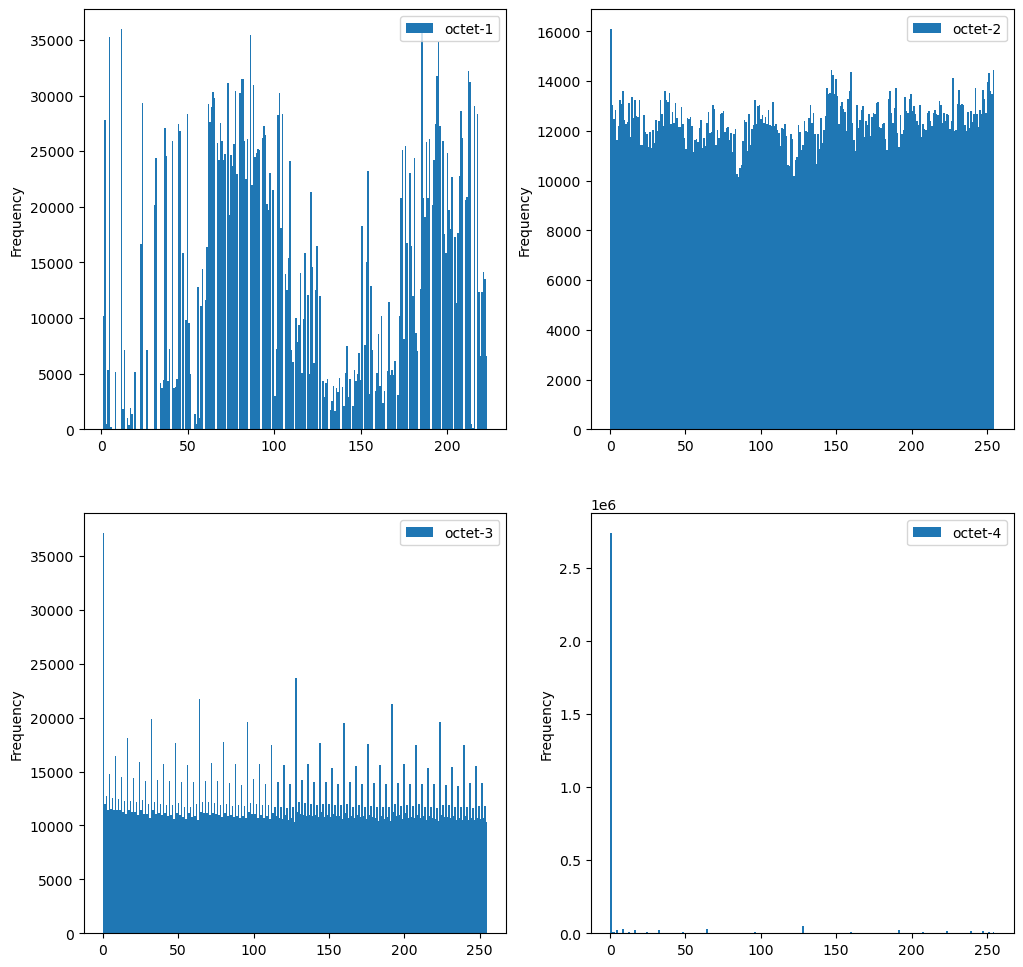

In [5]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(12, 12), ncols=2, nrows=2)
for index, column in enumerate(octets):
    dbip_df[column].plot.hist(ax=ax.ravel()[index], bins=256, legend=True)

Wild. These aren't close to being uniform.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


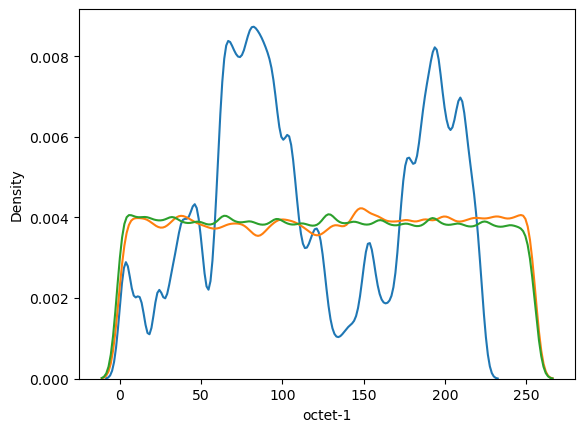

In [6]:
from seaborn import kdeplot
_, ax = subplots()
for index, column in enumerate(octets[:-1]):
    kdeplot(ax=ax, data=dbip_df, x=column)

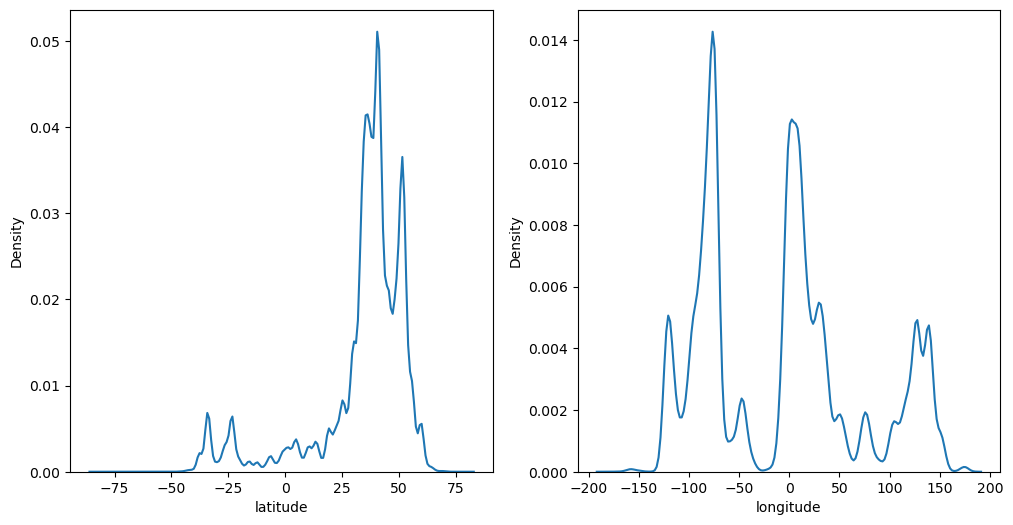

In [7]:
from seaborn import kdeplot
_, ax = subplots(figsize=(12, 6), ncols=2, nrows=1)
for index, column in enumerate(['latitude', 'longitude']):
    kdeplot(ax=ax[index], data=dbip_df, x=column)

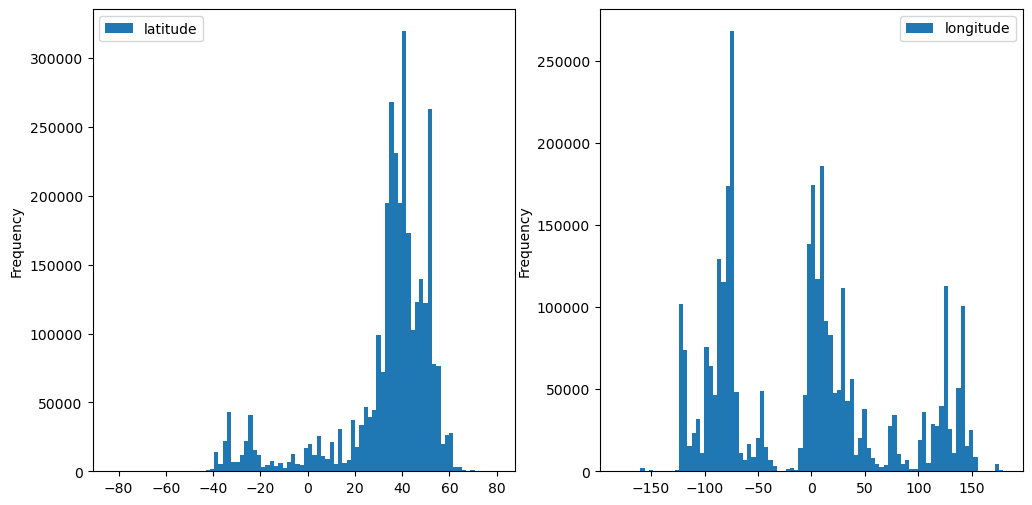

In [8]:
fig, ax = subplots(figsize=(12, 6), ncols=2, nrows=1)
for index, column in enumerate(['latitude', 'longitude']):
    dbip_df[column].plot.hist(ax=ax.ravel()[index], bins=90, legend=True)

Latitude is north-south and is positive in the northern hemisphere, so we expect most of the IP addresses to be clustered around 40degN. 
Longitude runs east-west with positive to the right of London; we expect to see modes for North America, Europe, and Asia.

In [9]:
from plotly.express import scatter_geo
scatter_geo(data_frame=dbip_df.sample(n=50000), lat='latitude', lon='longitude', color='octet-1').show()

In [10]:
whois_df = pd.read_csv(filepath_or_buffer='/kaggle/input/global-ip-dataset-by-location-2023/geo-whois-asn-country-ipv4.csv',
                      names=['IPv4', 'gateway', 'ISO-2'])
whois_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241716 entries, 0 to 241715
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   IPv4     241716 non-null  object
 1   gateway  241716 non-null  object
 2   ISO-2    241654 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


In [11]:
geolite_df = pd.read_csv(filepath_or_buffer='/kaggle/input/global-ip-dataset-by-location-2023/geolite2-city-ipv4.csv',
                         header=None, ).drop(columns=[4])
geolite_df.columns = ['IPv4', 'gateway', 'ISO-2', 'state', 'city', 'postcode', 'latitude', 'longitude', 'Region?']
geolite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823586 entries, 0 to 2823585
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   IPv4       object 
 1   gateway    object 
 2   ISO-2      object 
 3   state      object 
 4   city       object 
 5   postcode   object 
 6   latitude   float64
 7   longitude  float64
 8   Region?    object 
dtypes: float64(2), object(7)
memory usage: 193.9+ MB


In [12]:
geolite_df.head()

,IPv4,gateway,ISO-2,state,city,postcode,latitude,longitude,Region?
0,1.0.0.0,1.0.0.127,AU,Victoria,Moondarra,3825,-38.0248,146.3710,Australia/Melbourne
1,1.0.0.128,1.0.0.255,AU,Western Australia,Clarkson,6030,-31.6866,115.7281,Australia/Perth
2,1.0.1.0,1.0.3.255,CN,NaN,NaN,NaN,34.7732,113.7220,Asia/Shanghai
3,1.0.4.0,1.0.7.255,AU,New South Wales,Sydney,2000,-33.8715,151.2006,Australia/Sydney
4,1.0.8.0,1.0.15.255,CN,NaN,NaN,NaN,34.7732,113.7220,Asia/Shanghai


In [13]:
geolite_df.nunique()

IPv4         2823586
gateway      2823586
ISO-2            249
state           3291
city           93792
postcode       87538
latitude      107479
longitude     118559
Region?          399
dtype: int64

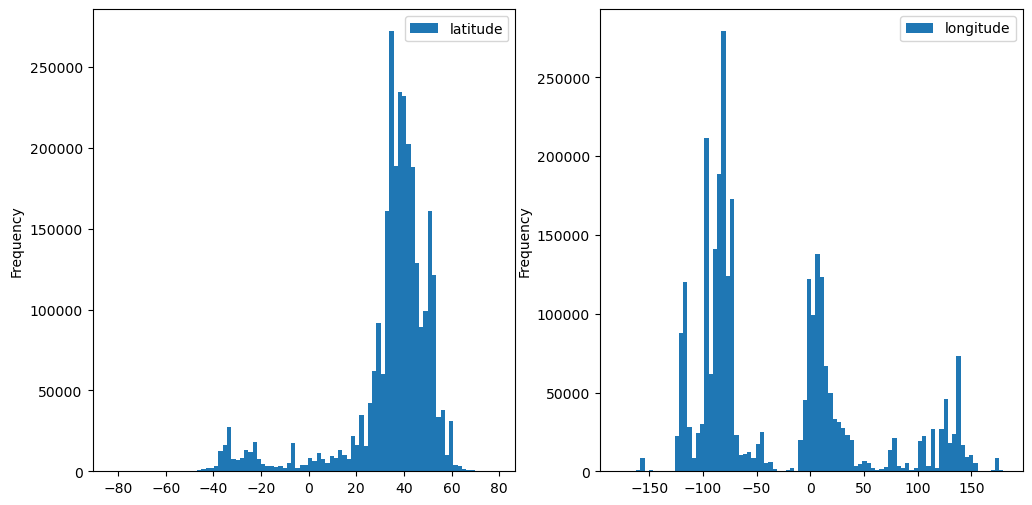

In [14]:
fig, ax = subplots(figsize=(12, 6), ncols=2, nrows=1)
for index, column in enumerate(['latitude', 'longitude']):
    geolite_df[column].plot.hist(ax=ax.ravel()[index], bins=90, legend=True)

In [15]:
scatter_geo(data_frame=geolite_df.sample(n=10000), lat='latitude', lon='longitude', color='Region?').show()

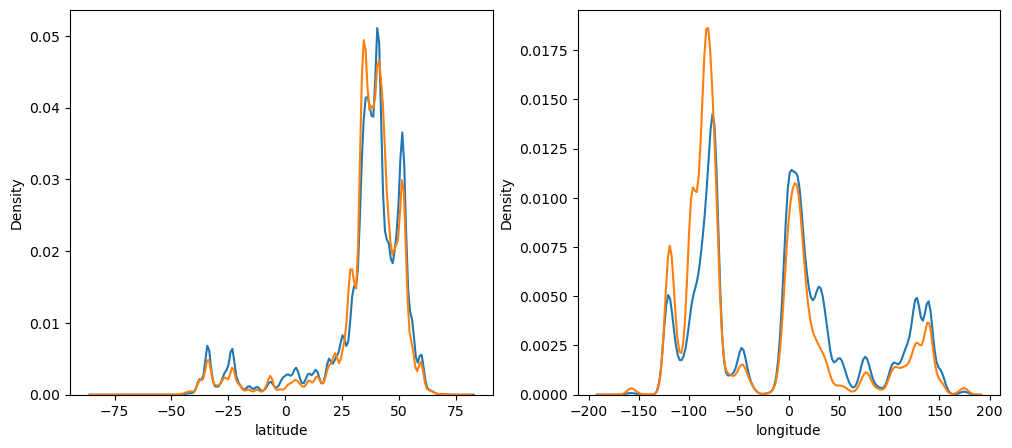

In [16]:
_, ax = subplots(figsize=(12, 5), ncols=2, )
for index, column in enumerate(['latitude', 'longitude']):
    kdeplot(ax=ax[index], data=dbip_df, x=column)
    kdeplot(ax=ax[index], data=geolite_df, x=column)

These are plots of the full datasets, so we can see that the distributions are similar but not the same.